In [1]:
# Importing the required libraries
import Scrapset as m
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In [2]:
# Using the Scrapset library to scrape data from the IMDB website
imdb = m.imdb()
data = imdb.comments(
    "https://www.imdb.com/title/tt23289160/reviews/?ref_=ttrt_sa_3")

In [3]:
# Transforming the data into a Pandas data frame
df = pd.DataFrame(data, columns=["Uncleaned_Review"])
df.to_csv("godzilla_reviews.csv")
df.head()

,Uncleaned_Review
0,10/10\nOne of the year's best films - a must s...
1,9/10\nThe best movie I've seen in the theater ...
2,9/10\nMaybe the best Godzilla movie since the ...
3,10/10\nOUTSTANDING\nrhmacl30 November 2023\nTh...
4,10/10\nThis is what a Godzilla is supposed to ...


## Data Wrangling

In [4]:
# Getting the first field value to see how it's structured
df.Uncleaned_Review[0]

"10/10\nOne of the year's best films - a must see for franchise fans of the iconic sci-fi monster that entertains on every level. Utterly fantastic!\ngeorge.schmidt1 December 2023\nGODZILLA MINUS ONE (2023) **** Ryunosuke Kamiki, Minami Hamabe, Sakura Ando, Yuki Yamada, Kuranosuke Sasake, Hidetaka Yaoshioka, Yuya Endo, Saki Nakatani. Director Takashi Yamazaki's Herculean efforts of reviving the Kaiju franchise is effortlessly awesome and absolutely top-tier filmmaking with the origin story of the gigantic monster showing up off the shores of post WWII Japan as it engages a full-tilt invasion of Tokyo and its environs with atypical destruction and death. Key to the film's strength is the plot involving ex-kamikaze pilot Kamiki (suffering arguably cinema's most poignant PTSD) and love interest Hamabe as a make-shift family attempting to survive with the thread of a palpable redemption narrative laced with surprisingly heartfelt emotion. The clean visual f/x propel the radioactive creatur

In [5]:
# Splitting the "Uncleaned_Review" column by the first three line feeds
df[["Rating", "Review_Title", "User/Date", "Uncleaned_Text"]
   ] = df.Uncleaned_Review.str.split("\n", expand=True, n=3)

# Splitting the "Uncleaned_Text" column by the last two line feeds
df[["Text", "Helpfulness", "Permalink"]
   ] = df.Uncleaned_Text.str.rsplit("\n", expand=True, n=2)

In [6]:
# Removing all columns except "Rating" and "Text
df.drop(["Uncleaned_Review", "User/Date", "Uncleaned_Text",
        "Helpfulness", "Permalink", "Review_Title"], axis=1, inplace=True)

In [7]:
# Getting the unique values and their frequencies of the "Rating" column
df.Rating.value_counts()

Rating
10/10                                           2040
9/10                                            1273
8/10                                             623
7/10                                             138
6/10                                              74
3/10                                              26
5/10                                              25
Perhaps the best film of 2023                     14
Self Reliance Prevails                            11
The finest Godzilla movie since the original      11
4/10                                              11
1/10                                              10
2/10                                              10
Confirmed: Godzilla is cool                        1
Name: count, dtype: int64

In [8]:
# Replacing values in the "Rating" column
df.Rating.replace({"10/10": 10,
                   "9/10": 9,
                   "8/10": 8,
                   "7/10": 7,
                   "6/10": 6,
                   "5/10": 5,
                   "4/10": 4,
                   "3/10": 3,
                   "2/10": 2,
                   "1/10": 1
                   }, inplace=True)

In [9]:
# Removing all rows without a number in the "Rating" column
df.drop(df[~df.Rating.isin([1,2,3,4,5,6,7,8,9,10])].index, inplace=True)

In [10]:
# Changing the data type of the "Rating" column to integer
df.Rating = df.Rating.astype(int)

In [11]:
# Getting the unique values and their frequencies of the "Text" column
df.Text.value_counts()

Text
GODZILLA MINUS ONE (2023) **** Ryunosuke Kamiki, Minami Hamabe, Sakura Ando, Yuki Yamada, Kuranosuke Sasake, Hidetaka Yaoshioka, Yuya Endo, Saki Nakatani. Director Takashi Yamazaki's Herculean efforts of reviving the Kaiju franchise is effortlessly awesome and absolutely top-tier filmmaking with the origin story of the gigantic monster showing up off the shores of post WWII Japan as it engages a full-tilt invasion of Tokyo and its environs with atypical destruction and death. Key to the film's strength is the plot involving ex-kamikaze pilot Kamiki (suffering arguably cinema's most poignant PTSD) and love interest Hamabe as a make-shift family attempting to survive with the thread of a palpable redemption narrative laced with surprisingly heartfelt emotion. The clean visual f/x propel the radioactive creature is jaw-droppingly astounding with some neat extras (his spiny back igniting as it re-charges its nuclear energies is eye-poppingly epic). One of the year's best films.       

In [12]:
# Removing duplicates in the data frame
df.drop_duplicates(inplace=True)

In [13]:
# Removing all rows with the text "Warning: Spoilers" in the "Text" column
df.drop(df[df.Text == "Warning: Spoilers"].index, inplace=True)

In [14]:
# Adding the "Word_Count" column by counting the number of words in each field value of the "Text" column
df["Word_Count"] = df.Text.apply(lambda x: len(x.split()))

In [15]:
# Adding the "Rating_Category" column by classifying the values in the "Rating" column
df["Rating_Category"] = np.where((df.Rating >= 8) & (df.Rating <= 10), "Positive",
                                 np.where((df.Rating >= 5) & (df.Rating <= 7), "Neutral", "Negative"
                                          ))

In [16]:
# Previewing the first five rows of the data frame
df.head()

,Rating,Text,Word_Count,Rating_Category
0,10,GODZILLA MINUS ONE (2023) **** Ryunosuke Kamik...,147,Positive
2,9,"I'm a huge fan of Godzilla, I think the origin...",293,Positive
3,10,"This is an exciting film. The pace, story, ima...",143,Positive
4,10,"From the opening to the ending, I was enthrall...",112,Positive
5,9,Godzilla Minus One is an amazing spectacle on ...,104,Positive


In [17]:
# Getting information from each column of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 4265
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rating           368 non-null    int32 
 1   Text             368 non-null    object
 2   Word_Count       368 non-null    int64 
 3   Rating_Category  368 non-null    object
dtypes: int32(1), int64(1), object(2)
memory usage: 12.9+ KB


In [18]:
# Getting descriptive statistics of numeric columns
df.describe()

,Rating,Word_Count
count,368.000000,368.000000
mean,8.904891,231.855978
std,1.642149,182.300044
min,1.000000,100.000000
25%,8.750000,122.000000
50%,9.000000,160.000000
75%,10.000000,277.750000
max,10.000000,1330.000000


## Data Visualization

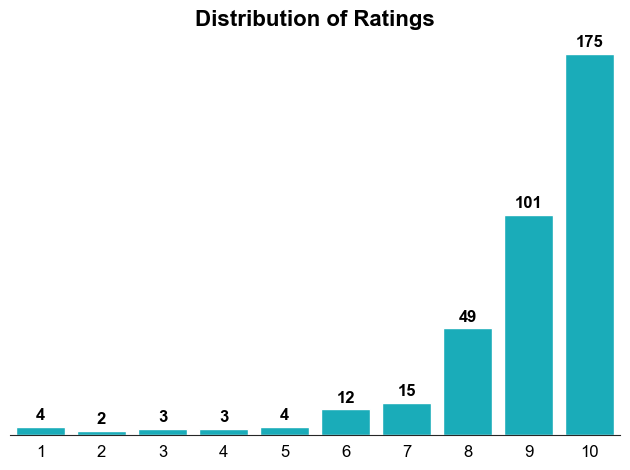

In [19]:
# Plotting a Count Column Chart of the "Rating" column
sns.set_style("white")
ax = sns.countplot(data=df, x="Rating", color="#00c2d3")

# Adding data labels to the chart
for p in ax.patches: 
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y=height + 3,
            s='{:.0f}'.format(height),
            ha='center',
            fontdict={"fontweight": "bold", "fontsize": 12, "color": "black"})

# Formatting the chart
plt.title("Distribution of Ratings",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black")

sns.despine(left=True)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.xticks(fontsize=12, color="black")
plt.tight_layout()
plt.savefig("rating-distribution.png", dpi=100, bbox_inches="tight")
plt.show()

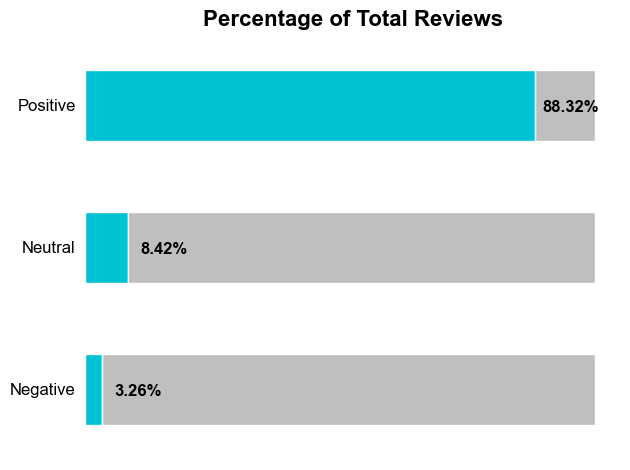

In [20]:
# Creating the "stackedchart_df" data frame 
#   with the unique values and their proportions of the "Rating_Category" column
stackedchart_df = df.Rating_Category.value_counts(normalize=True).to_frame()
stackedchart_df["other"] = 1 - stackedchart_df.proportion
stackedchart_df.sort_values("other", ascending=False, inplace=True)

# Plotting a 100% Stacked Bar Chart of the "stackedchart_df" data frame
ax = stackedchart_df.plot(kind='barh', stacked=True,
                          colormap=ListedColormap(["#00c2d3", "#BFBFBF"]))

# Adding data labels to the chart
p1, p2, p3, *p = ax.patches

for p in [p1, p2, p3]:
    width = p.get_width()
    ax.text(y=p.get_y()+(p.get_height()/2.5),
            x=width+0.07,
            s='{:.2%}'.format(width),
            ha='center',
            fontdict={"fontweight": "bold", "fontsize": 12, "color": "black"})

# Formatting the chart
plt.title("Percentage of Total Reviews",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black")

ax.get_legend().remove()
sns.despine(bottom=True, left=True)
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
plt.yticks(fontsize=12, color="black")
plt.tight_layout()
plt.savefig("percentage-total-reviews.png", dpi=100, bbox_inches="tight")
plt.show()

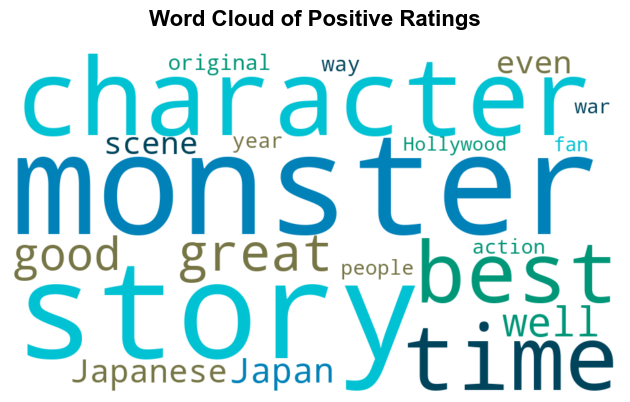

In [21]:
# Creating the "positive_df" data frame 
#   by filtering the "Rating Category" column to show only the rows with the "Positive" value
positive_df = df[df.Rating_Category == "Positive"]

# Setting the stop words set for the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["film", "films", "movie", "movies", "Godzilla", "Minus", "One", "Shin",
                  "make", "seen", "feel", "made", "see", "take", "look", "watch", "say",
                  "think", "felt", "know", "much", "will",  "really", "many", "thing",
                  "first", "something"])

# Plotting a Word Cloud of the "positive_df" data frame
text = " ".join(review for review in positive_df.Text)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      min_word_length=3,
                      max_words=20,
                      prefer_horizontal=True,
                      width=900,
                      height=500,
                      random_state=40,
                      colormap=ListedColormap(
                          ["#00c2d3", "#0081B8", "#00445C", "#009678", "#767545"])
                      ).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")

# Formatting the chart
plt.title("Word Cloud of Positive Ratings",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black",
          pad=20)

plt.axis("off")
plt.tight_layout()
plt.savefig("positive-word-cloud.png", dpi=100, bbox_inches="tight")
plt.show()

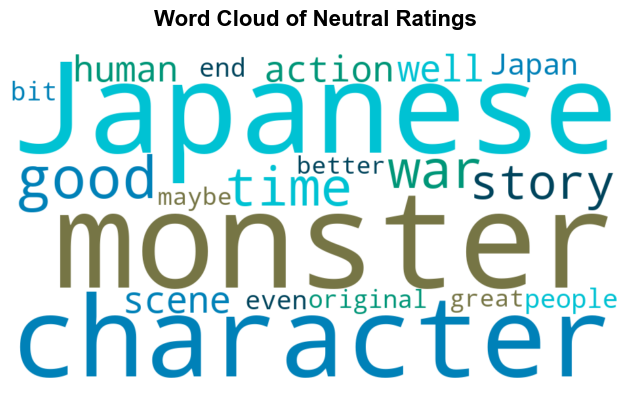

In [22]:
# Creating the "neutral_df" data frame 
#   by filtering the "Rating Category" column to show only the rows with the "Neutral" value
neutral_df = df[df.Rating_Category == "Neutral"]

# Plotting a Word Cloud of the "neutral_df" data frame
text = " ".join(review for review in neutral_df.Text)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      min_word_length=3,
                      max_words=20,
                      prefer_horizontal=True,
                      width=900,
                      height=500,
                      random_state=520,
                      colormap=ListedColormap(
                          ["#00c2d3", "#0081B8", "#00445C", "#009678", "#767545"])
                      ).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")

# Formatting the chart
plt.title("Word Cloud of Neutral Ratings",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black",
          pad=20)

plt.axis("off")
plt.tight_layout()
plt.savefig("neutral-word-cloud.png", dpi=100, bbox_inches="tight")
plt.show()

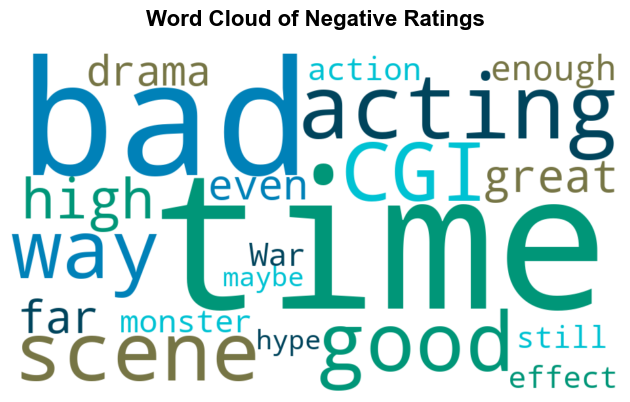

In [23]:
# Creating the "negative_df" data frame 
#   by filtering the "Rating Category" column to show only the rows with the "Negative" value
negative_df = df[df.Rating_Category == "Negative"]

# Plotting a Word Cloud of the "negative_df" data frame
text = " ".join(review for review in negative_df.Text)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      min_word_length=3,
                      max_words=20,
                      prefer_horizontal=True,
                      width=900,
                      height=500,
                      random_state=110,
                      colormap=ListedColormap(
                          ["#00c2d3", "#0081B8", "#00445C", "#009678", "#767545"])
                      ).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")

# Formatting the chart
plt.title("Word Cloud of Negative Ratings",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black",
          pad=20)

plt.axis("off")
plt.tight_layout()
plt.savefig("negative-word-cloud.png", dpi=100, bbox_inches="tight")
plt.show()

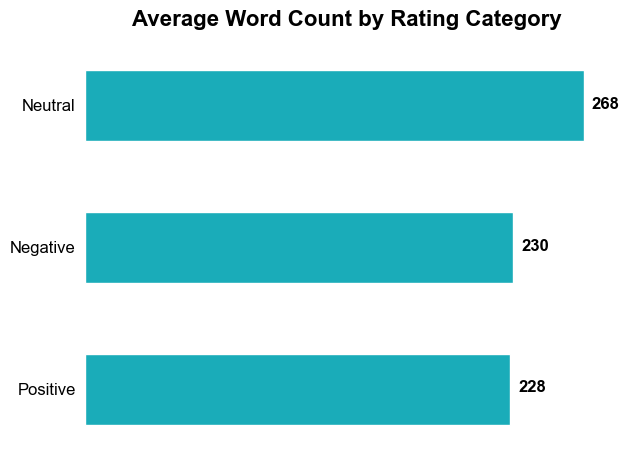

In [24]:
# Plotting a Bar Chart with the average of the "Word_Count" column
ax = sns.barplot(data=df, y="Rating_Category", x="Word_Count",
                 errorbar=None,
                 color="#00c2d3",
                 width=0.5, 
                 order=["Neutral", "Negative", "Positive"])

# Adding data labels to the chart
for p in ax.patches:
    width = p.get_width()
    ax.text(y=p.get_y()+(p.get_height()/1.83),
            x=width + 12,
            s='{:.0f}'.format(width),
            ha='center',
            fontdict={"fontweight": "bold", "fontsize": 12, "color": "black"})

# Formatting the chart
plt.title("Average Word Count by Rating Category",
          fontdict={"fontweight": "bold", "fontsize": 16},
          color="black")

sns.despine(bottom=True, left=True)
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
plt.yticks(fontsize=12, color="black")
plt.tight_layout()
plt.savefig("average-word-count.png", dpi=100, bbox_inches="tight")
plt.show()